# Health Care Project

**by**

## Sulfikar Shajimon

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 1. Preliminary Analysis

### 1.1 Load the data and perform a preliminary inspection

In [2]:
df = pd.read_excel('Dataset/data.xlsx')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values!

In [6]:
print("\nDuplicate Rows:")
df.duplicated().value_counts()


Duplicate Rows:


False    302
True       1
dtype: int64

In [7]:
df[df.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### 1.2 Remove duplicates and handle missing values

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

No duplicates now

## 2. Data Analysis and Visualization

### 2.1 Preliminary Statistical Summary

In [10]:
print("\nStatistical Summary:")
df.describe().T


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [11]:
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

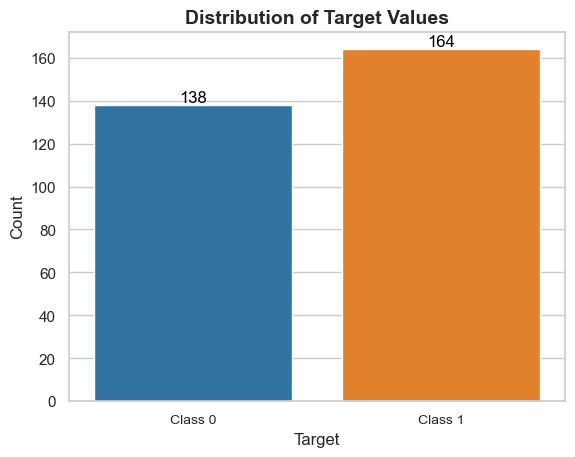

In [12]:
sns.set(style="whitegrid")
ax = sns.countplot(x='target', data=df, palette=['#1f77b4', '#ff7f0e'])

# Title and labels
plt.title('Distribution of Target Values', fontsize=14, fontweight='bold')
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(len(df['target'].unique())), labels=['Class 0', 'Class 1'], fontsize=10)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

The minimal difference between the target values indicates that the dataset is well-balanced.

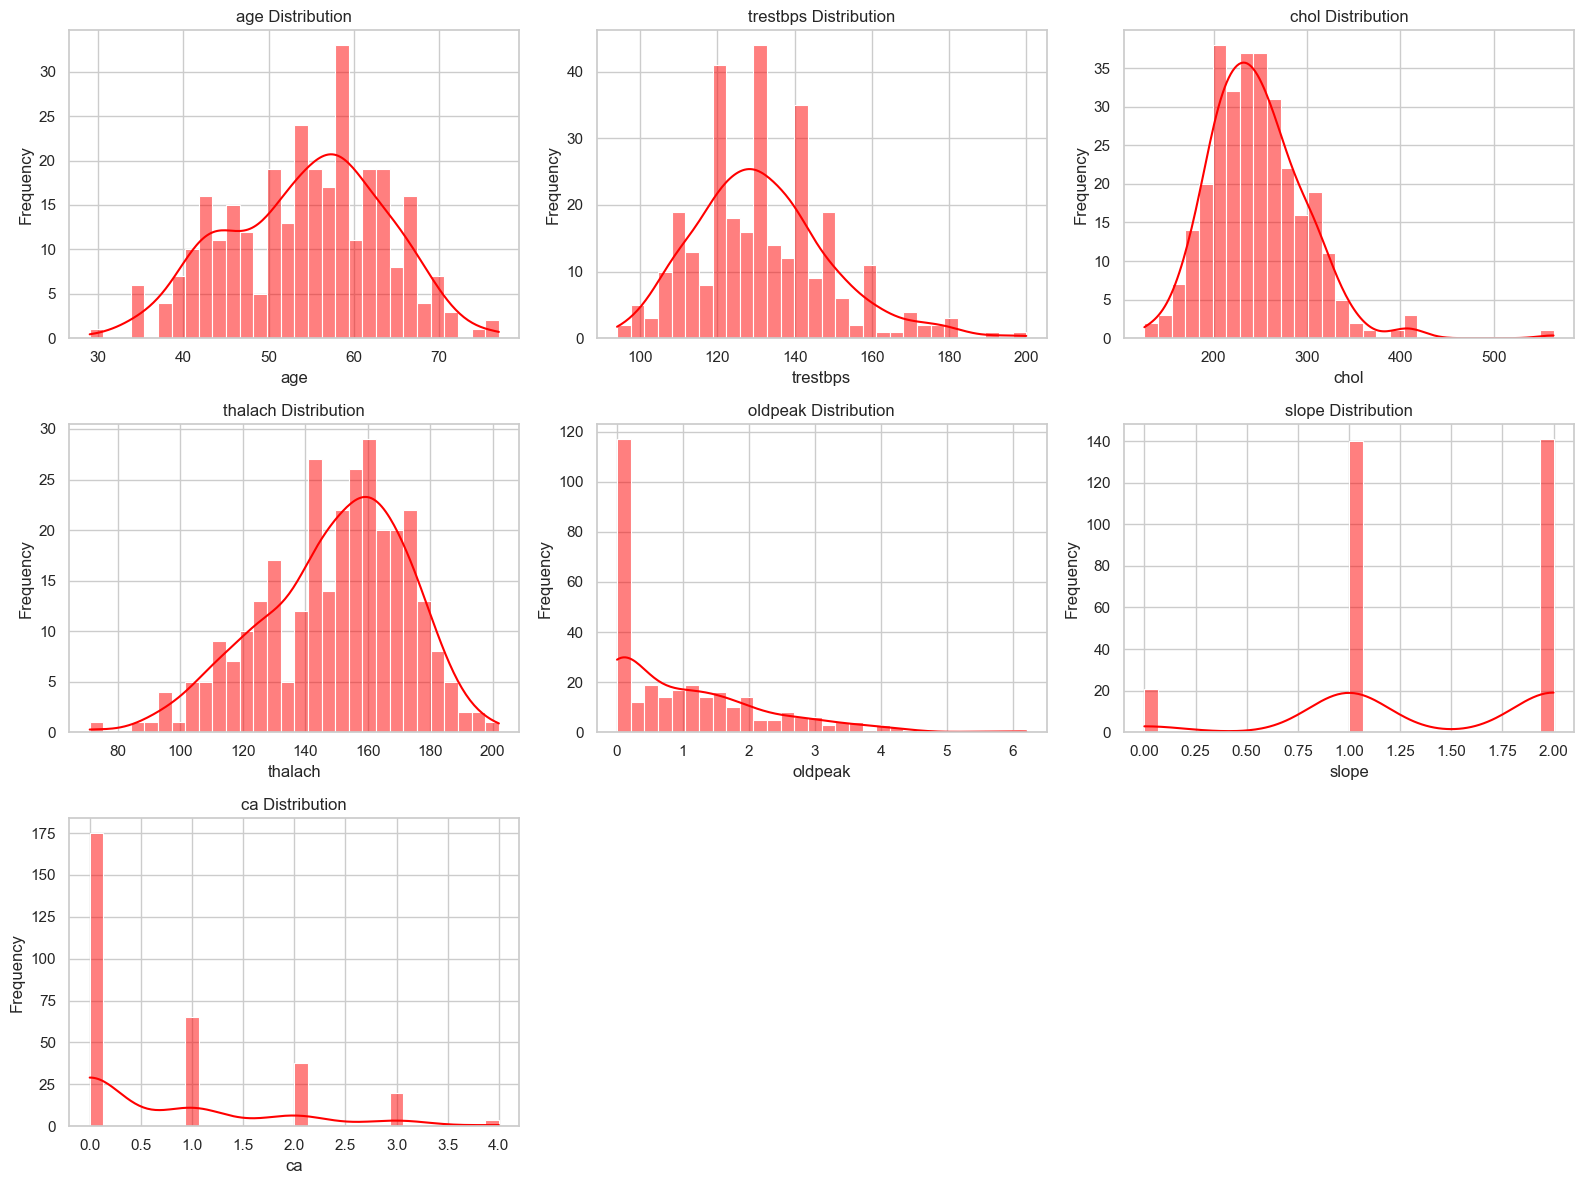

In [13]:
# Numerical Features Analysis
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, color='red', bins=30)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 2.2 Identifying and exploring categorical variables

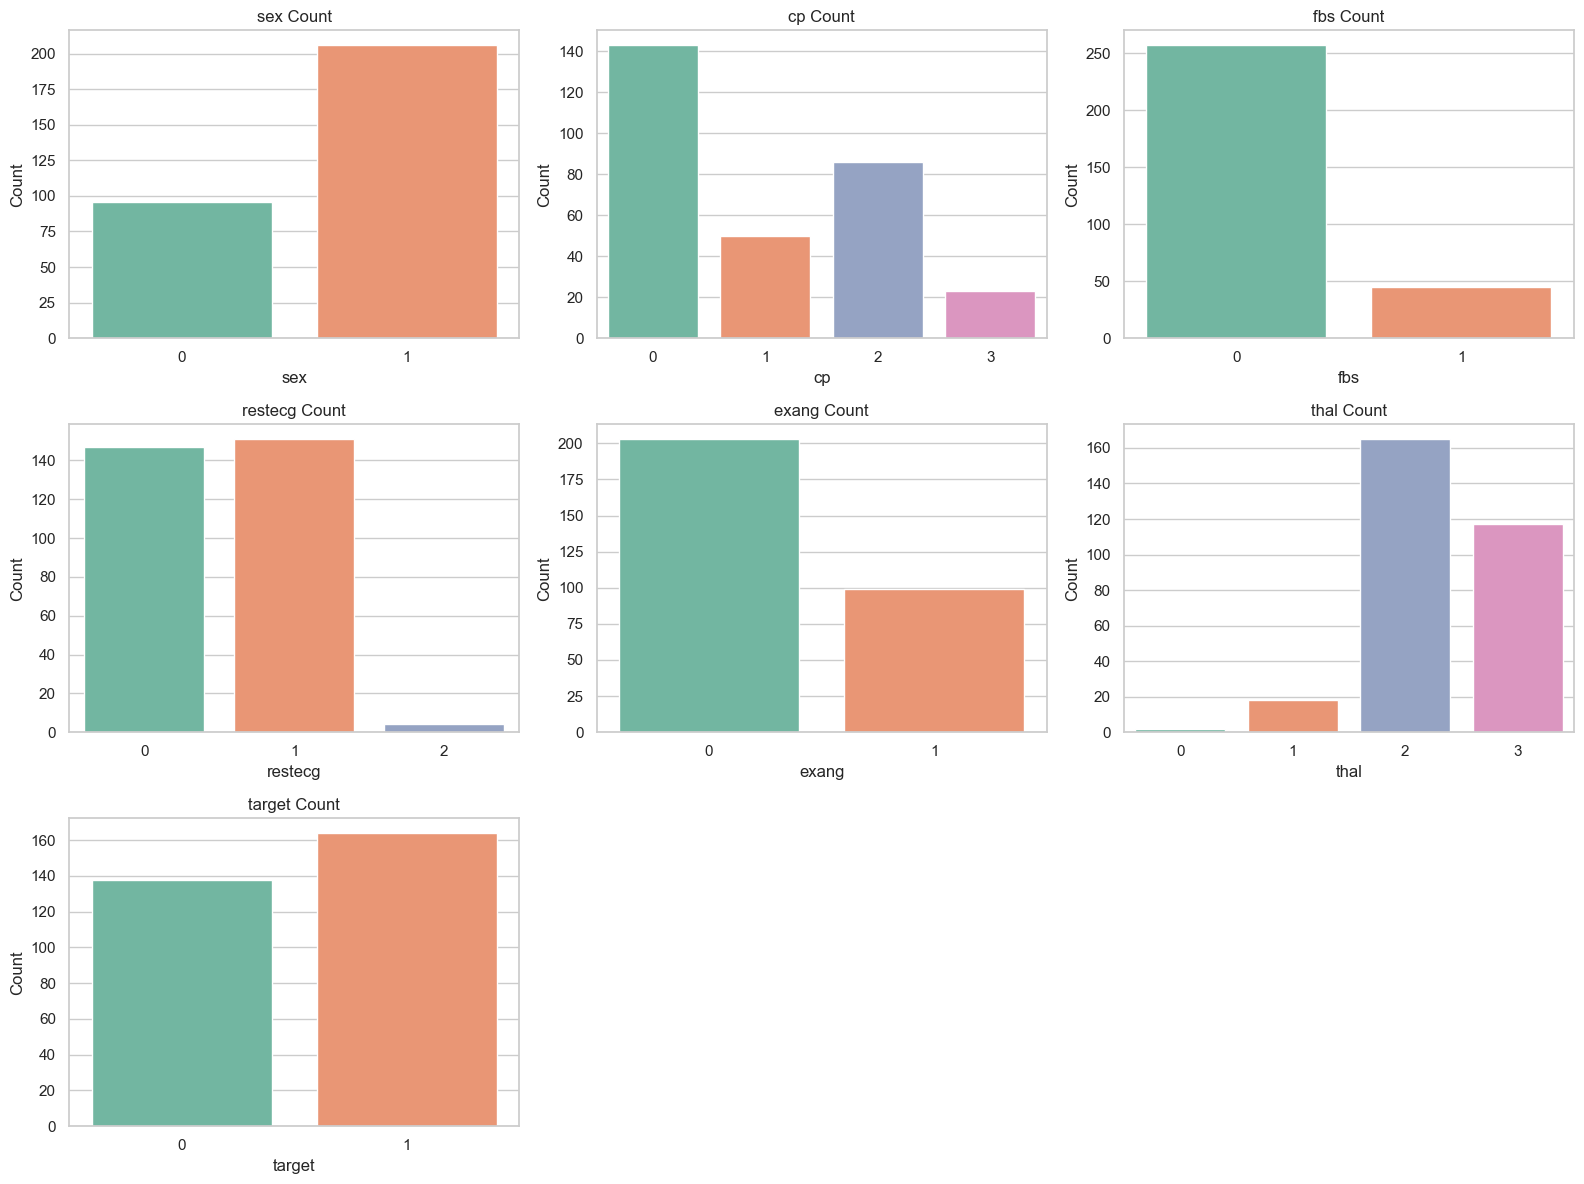

In [14]:
# Categorical Features Analysis
categorical_features = [
    'sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'target'
]

plt.figure(figsize=(16, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'{feature} Count')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [15]:
# Compute and print value counts for categorical features
print("Categorical Features Summary:")
for feature in categorical_features:
    print(f"\n{feature} value counts:")
    print(df[feature].value_counts())

Categorical Features Summary:

sex value counts:
1    206
0     96
Name: sex, dtype: int64

cp value counts:
0    143
2     86
1     50
3     23
Name: cp, dtype: int64

fbs value counts:
0    257
1     45
Name: fbs, dtype: int64

restecg value counts:
1    151
0    147
2      4
Name: restecg, dtype: int64

exang value counts:
0    203
1     99
Name: exang, dtype: int64

thal value counts:
2    165
3    117
1     18
0      2
Name: thal, dtype: int64

target value counts:
1    164
0    138
Name: target, dtype: int64


### 2.3 Occurrence of CVD across Age

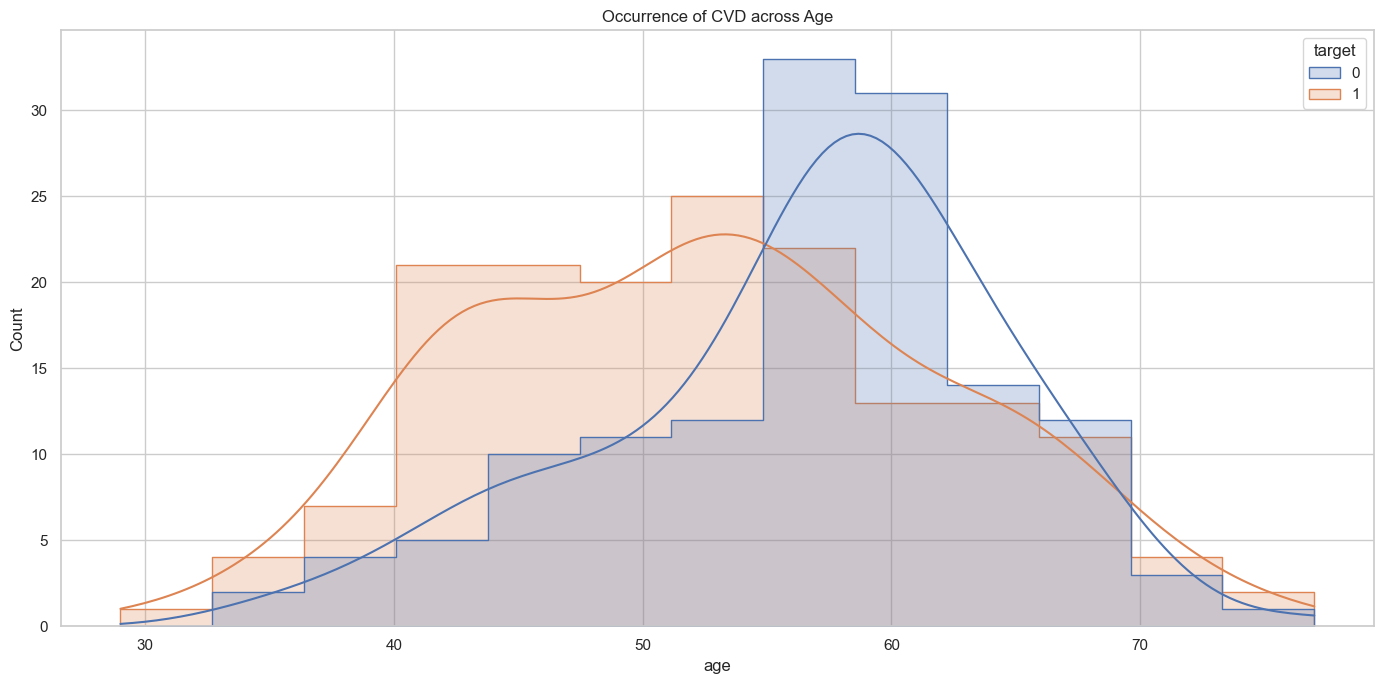

In [16]:
plt.figure(figsize=(14, 7))
sns.histplot(df, x='age', hue='target', kde=True, element="step")
plt.title('Occurrence of CVD across Age')
plt.tight_layout()
plt.show()

**The age range of 40-70 appears to be associated with a higher likelihood of cardiovascular diseases. However, examining the data for target=0 indicates that between ages 55 and 62, there are fewer observations of cardiovascular disease.**

**Moreover, cardiovascular diseases are observed across all age ranges within the dataset, which could be a potential cause for concern.**

### 2.4 Composition of patients with respect to Gender

In [17]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

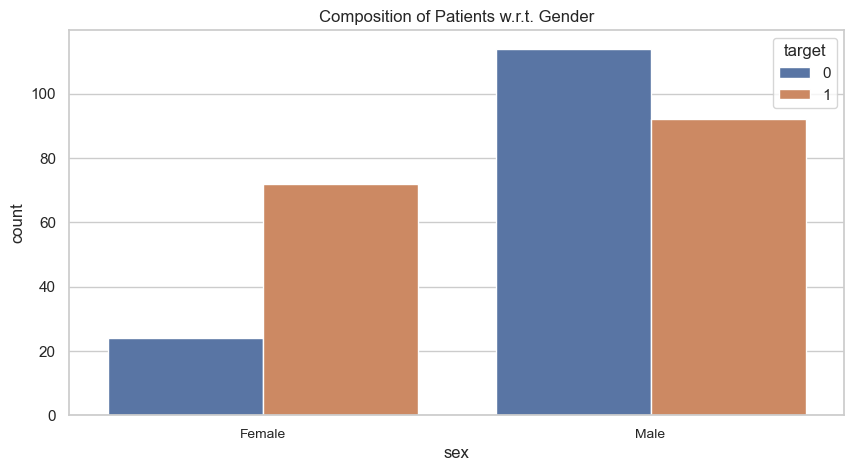

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Composition of Patients w.r.t. Gender')
plt.xticks(ticks=range(len(df['sex'].unique())), labels=['Female', 'Male'], fontsize=10)
plt.show()

### 2.5 Heart attack detection based on anomalies in Resting Blood Pressure

<Figure size 1400x700 with 0 Axes>

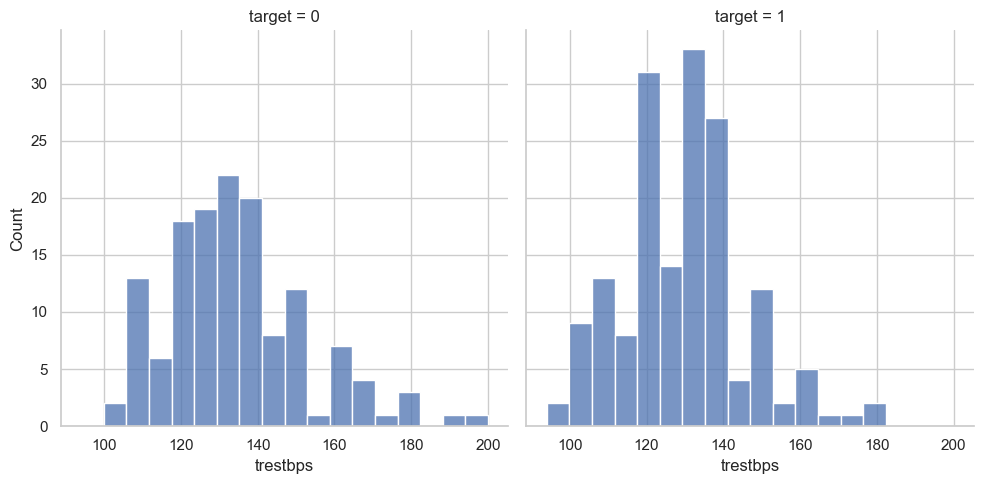

In [19]:
plt.figure(figsize=(14,7))
sns.displot(data=df, x="trestbps", col="target")
plt.tight_layout()
plt.show()

**Certain observations show extremely high resting blood pressure levels without any signs of cardiovascular disease. As we can see, there is a higher risk of CVD for resting blood pressure readings between 120 and 140. However, this feature by itself cannot be considered conclusive of CVD.**

### 2.6 Relationship between Cholesterol levels and Heart disease

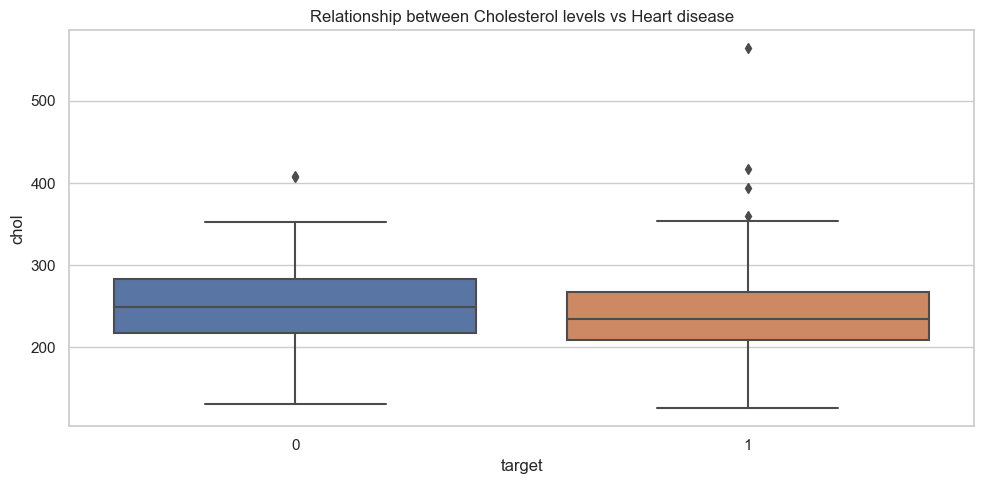

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(df, x='target', y='chol')
plt.title('Relationship between Cholesterol levels vs Heart disease')
plt.tight_layout()
plt.show()

**Similar to trestbps, Cholesterol levels alone cannot be used to draw significant conclusions concerning CVD.**

### 2.7 Relationship between Peak Exerise (Maximum Heart Rate) and Heart Disease

<Figure size 1000x500 with 0 Axes>

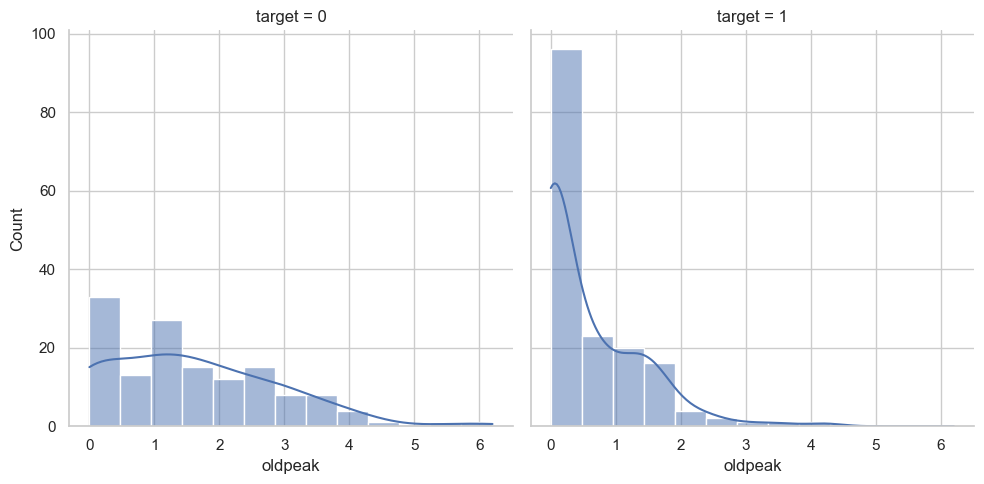

In [21]:
plt.figure(figsize=(10,5))
sns.displot(data= df, x= "oldpeak", col= "target", kde=True)
plt.tight_layout()
plt.show()

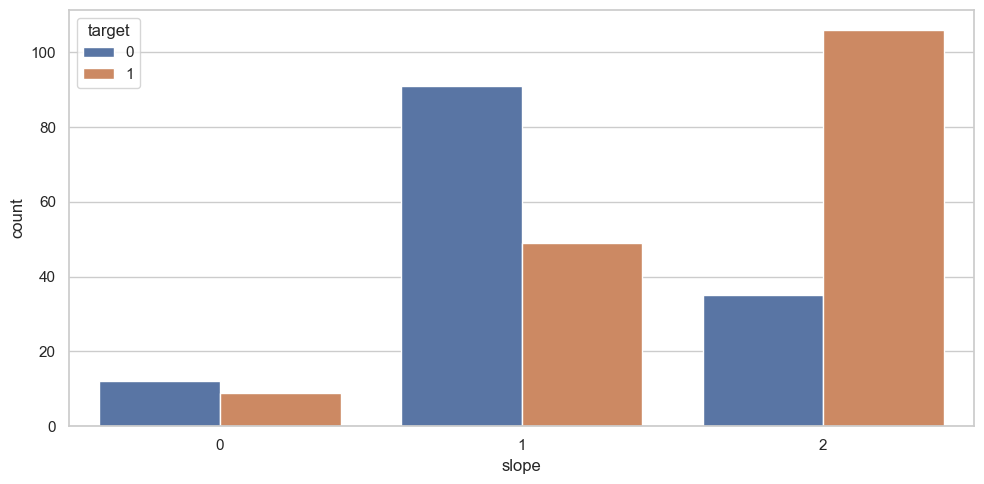

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x= "slope", hue= "target")
plt.tight_layout()
plt.show()

**It is evident from the above that there is a clear higher risk of CVD occurrence for lower values of ST Depression Induced on by Exercise as opposed to rest.**

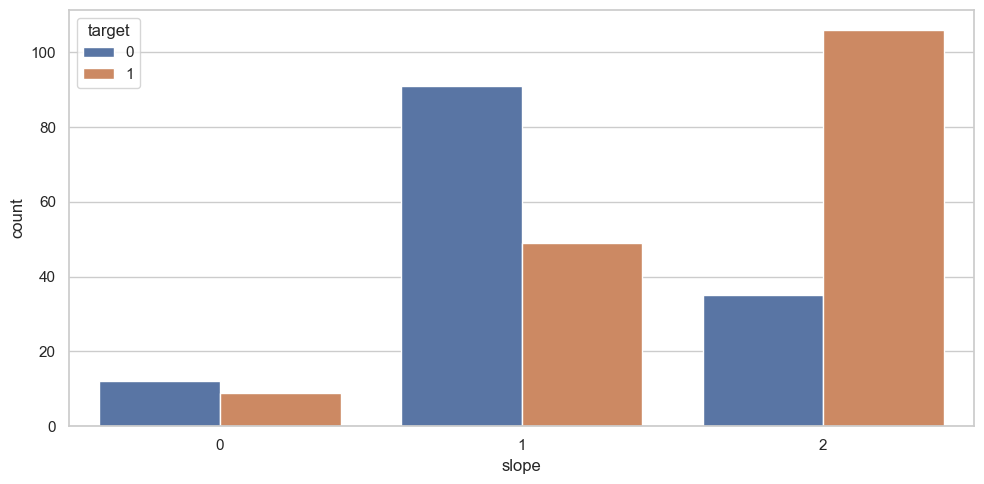

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x= "slope", hue= "target")
plt.tight_layout()
plt.show()

**There is a clear relationship between the Slope of the Peak Exercise ST segment and the occurrence of cardiovascular disease (CVD). Higher slope values are significantly associated with an increased likelihood of CVD.**

### 2.8 Impact of Thalassemia on CVD

In [24]:
df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

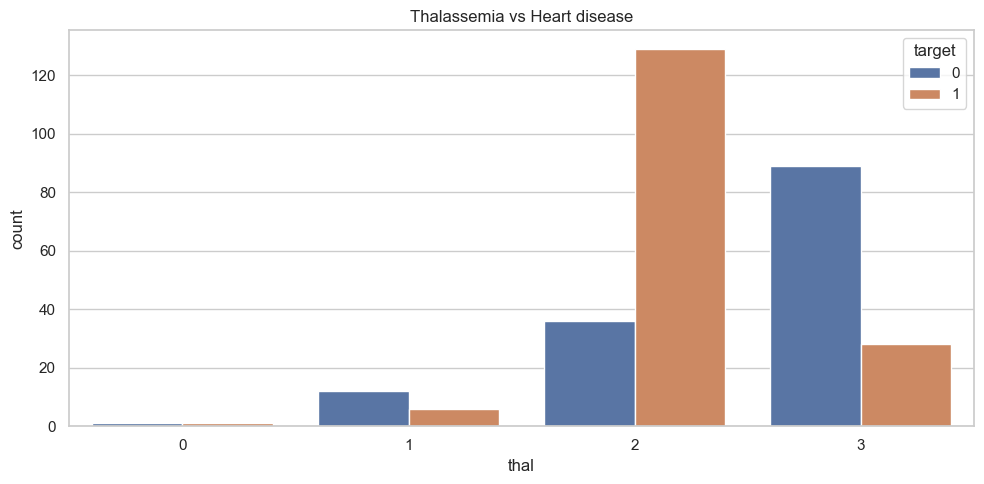

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x= "thal", hue= "target")
plt.title('Thalassemia vs Heart disease')
plt.tight_layout()
plt.show()

**It is evident that thalassemia appears to be a significant factor in the occurrence of cardiovascular disease (CVD).**

### 2.9 Other factors determining CVD

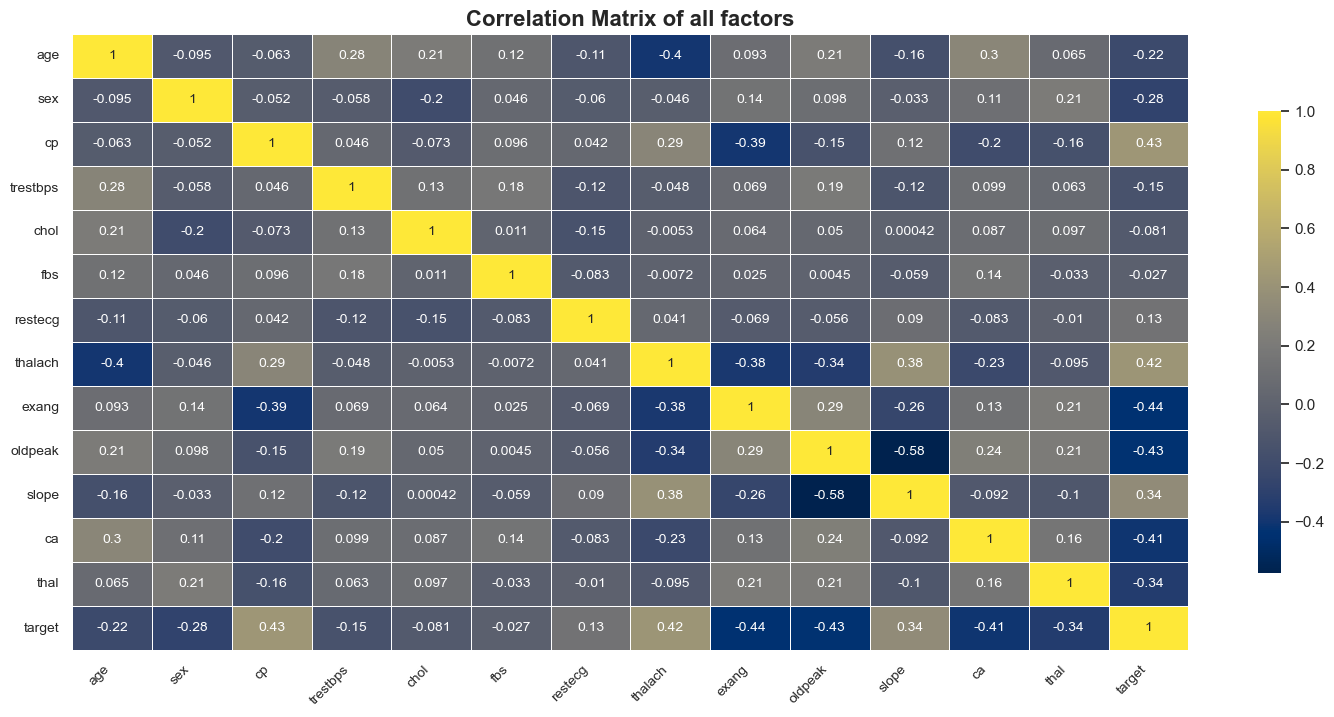

In [26]:
plt.figure(figsize=(18, 8))

# Use a more visually appealing color palette
sns.heatmap(df.corr(), annot=True, cmap='cividis', linewidths=0.5, linecolor='white', 
            annot_kws={"size": 10}, cbar_kws={'shrink': 0.75})

plt.title('Correlation Matrix of all factors', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()

**Chest pain (cp)**, **maximum heart rate achieved (thalach)**, and the **slope of the peak exercise ST segment (slope)** show a **moderately strong positive correlation** with the occurrence of cardiovascular disease (CVD).

Conversely, **exercise-induced angina (exang)**, **ST depression induced by exercise relative to rest (oldpeak)**, the **number of major vessels colored by fluoroscopy (ca)**, and **thalassemia (thal)** exhibit a **moderately strong negative correlation** with the occurrence of CVD.

In contrast, **cholesterol levels (chol)** and **fasting blood sugar (fbs)** demonstrate a **very low correlation** with heart disease.

### 2.10 Pair plot to understand the relationships 

<Figure size 1280x960 with 0 Axes>

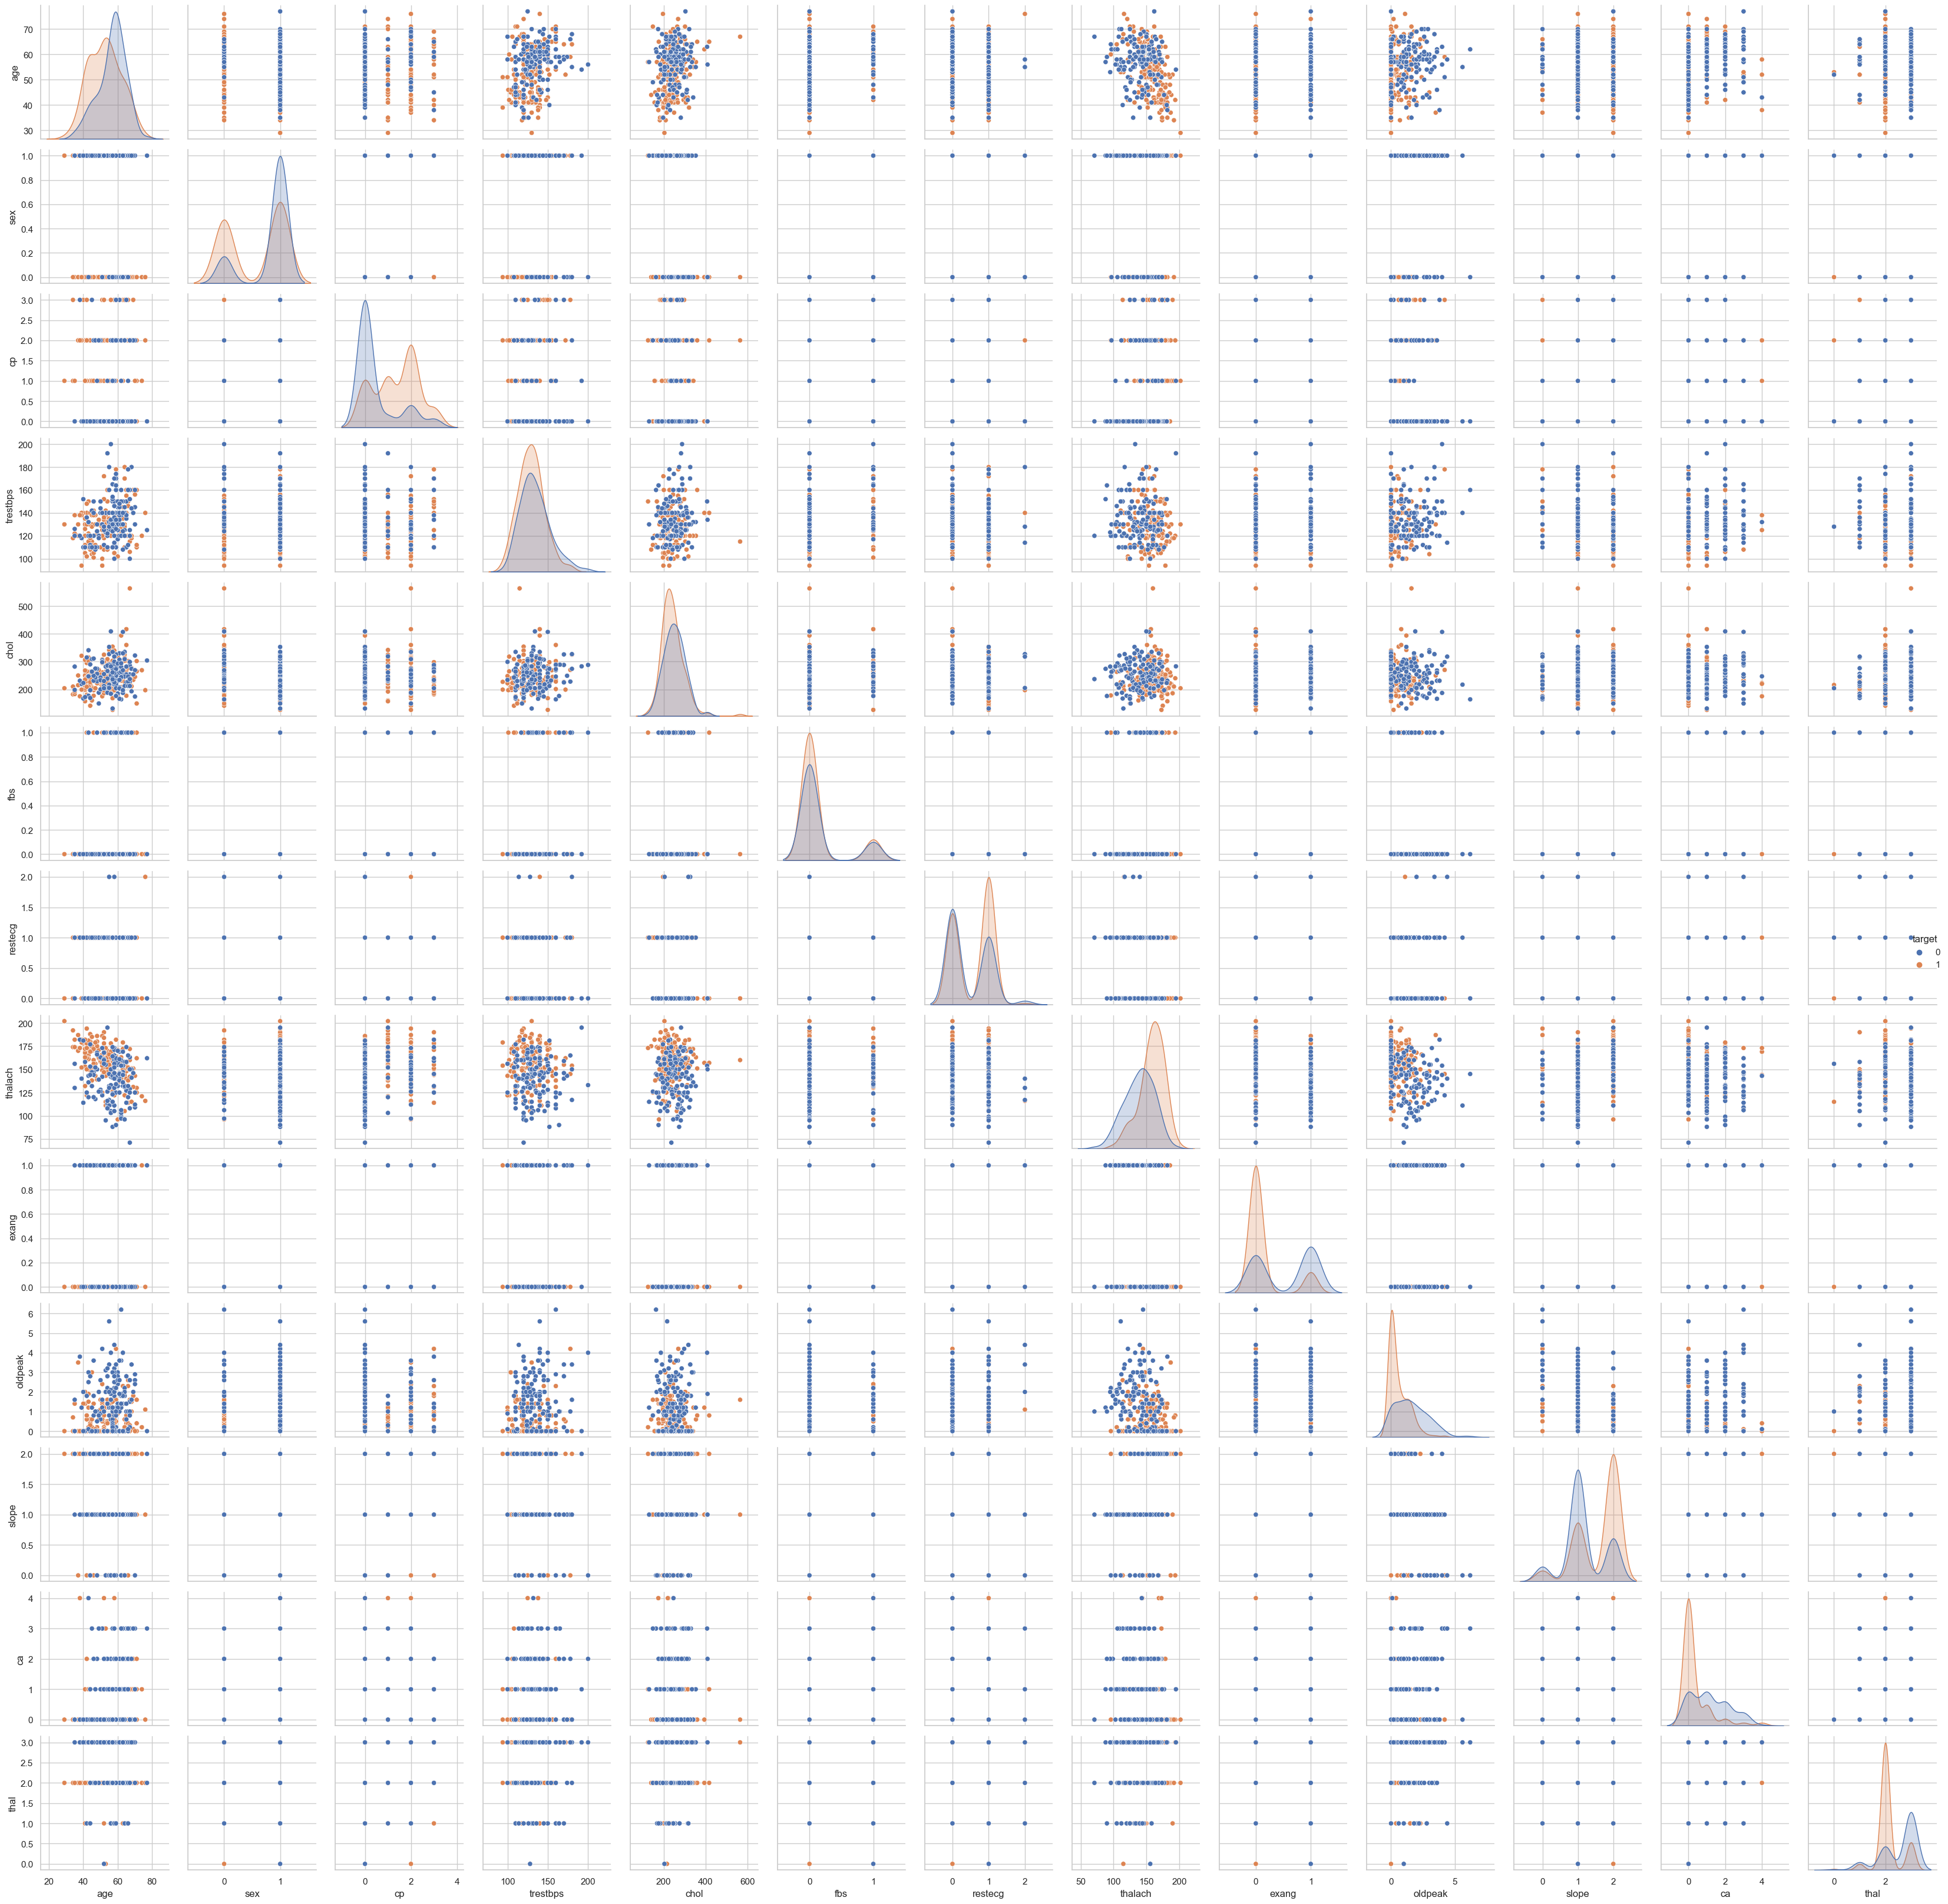

In [27]:
plt.figure(dpi=200)
sns.pairplot(df, hue= "target")
plt.tight_layout()
plt.show()

**There doesn't seem to be any obvious correlation between the features.**

## 3. Build a baseling model using Logistic Regression

In [28]:
# Defining features and target variable
X = df.drop(columns=['target'])  # replace 'HeartDisease' with your target variable column name
y = df['target']

In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Creating and training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
# Predicting on test data
y_pred = model.predict(X_test)

In [32]:
# Evaluating the model
print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred)*100,2))


Accuracy Score: 82.42


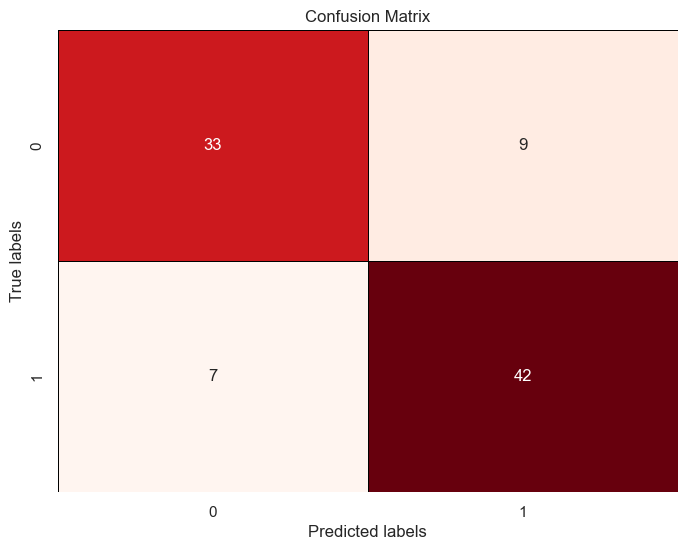

In [33]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', cbar=False, 
            annot_kws={"size": 12}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Summary of Confusion Matrix Analysis

The model effectively identifies true positives with 42 accurate detections of the condition. However, it has 7 false negatives, where the condition was missed, and 9 false positives, where the condition was incorrectly identified. The model also correctly predicted 33 cases where the condition was absent. Improvements are needed to reduce false positives and false negatives for better accuracy and reliability.

In [34]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91




The classification report shows that the model performs consistently well across both classes, with an overall accuracy of 82%. For Class 0, the precision is 0.82 and recall is 0.79, resulting in an F1-score of 0.80. For Class 1, the precision is 0.82 and recall is 0.86, with an F1-score of 0.84. The macro and weighted averages for precision, recall, and F1-score are all 0.82, indicating balanced and reliable performance.